# 0. Importing data

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

In [2]:
df = pd.read_excel('./multi_asset_etf_data.xlsx', sheet_name='excess returns')

In [3]:
df.head()

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
0,2009-04-30,0.008440,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295598,0.229649,0.022329,0.098793,-0.018505
1,2009-05-31,0.054143,0.163134,0.159871,0.132390,0.029026,-0.020302,0.023198,0.054364,0.028337,0.058925,0.020438
2,2009-06-30,0.004550,-0.026858,-0.023093,-0.014648,0.032919,-0.006170,-0.025461,0.044850,-0.004035,-0.001253,0.001383
3,2009-07-31,0.031311,0.018594,0.110173,0.100441,0.069217,0.008344,0.105826,0.143275,0.015352,0.074632,0.000905
4,2009-08-31,0.007192,-0.040800,-0.013571,0.044595,-0.017405,0.007199,0.131503,0.032977,-0.004586,0.036504,0.007978


In [4]:
df = df.drop('Date', axis=1)

# 1. Summary Statistics

## (a) Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)

In [5]:
rets = df.mean()
vols = df.std()

In [6]:
ann = pd.concat([rets * 12, vols * np.sqrt(12)], axis = 1, keys = ['Annualized Ret', 'Annualized Vol'])
ann

,Annualized Ret,Annualized Vol
BWX,-0.004532,0.085384
DBC,0.021884,0.175468
EEM,0.064970,0.194206
EFA,0.083817,0.164818
HYG,0.062909,0.088292
IEF,0.011250,0.064291
IYR,0.122743,0.189811
PSP,0.134369,0.226988
QAI,0.019373,0.050940
SPY,0.145133,0.147890


## (b) Which assets have the best and worst Sharpe ratios?

In [7]:
ann['Annualized Sharpe'] = ann['Annualized Ret'] / ann['Annualized Vol']
ann.sort_values('Annualized Sharpe')

,Annualized Ret,Annualized Vol,Annualized Sharpe
BWX,-0.004532,0.085384,-0.053080
DBC,0.021884,0.175468,0.124717
IEF,0.011250,0.064291,0.174981
EEM,0.064970,0.194206,0.334541
QAI,0.019373,0.050940,0.380306
TIP,0.020233,0.051752,0.390955
EFA,0.083817,0.164818,0.508542
PSP,0.134369,0.226988,0.591964
IYR,0.122743,0.189811,0.646659
HYG,0.062909,0.088292,0.712512


So `SPY` has the best Sharpe at 0.98, and `BWX` has the worst Sharpe at -0.05

# 2. Descriptive Analysis

## (a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

In [8]:
# The correlation matrix
df.corr()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.313258,0.647129,0.632233,0.574586,0.483613,0.497961,0.553404,0.680774,0.488523,0.637803
DBC,0.313258,1.000000,0.548695,0.559622,0.454801,-0.315121,0.289199,0.468025,0.520341,0.483189,0.122723
EEM,0.647129,0.548695,1.000000,0.852263,0.727496,-0.063252,0.627361,0.784057,0.809325,0.735565,0.313342
EFA,0.632233,0.559622,0.852263,1.000000,0.776654,-0.071464,0.707384,0.904622,0.858914,0.874924,0.311744
HYG,0.574586,0.454801,0.727496,0.776654,1.000000,0.046662,0.763390,0.826871,0.773005,0.774027,0.389613
IEF,0.483613,-0.315121,-0.063252,-0.071464,0.046662,1.000000,0.147228,-0.062593,0.111315,-0.084812,0.725957
IYR,0.497961,0.289199,0.627361,0.707384,0.763390,0.147228,1.000000,0.770262,0.672907,0.761533,0.429716
PSP,0.553404,0.468025,0.784057,0.904622,0.826871,-0.062593,0.770262,1.000000,0.846007,0.898974,0.331239
QAI,0.680774,0.520341,0.809325,0.858914,0.773005,0.111315,0.672907,0.846007,1.000000,0.846063,0.477704
SPY,0.488523,0.483189,0.735565,0.874924,0.774027,-0.084812,0.761533,0.898974,0.846063,1.000000,0.321820


<Axes: >

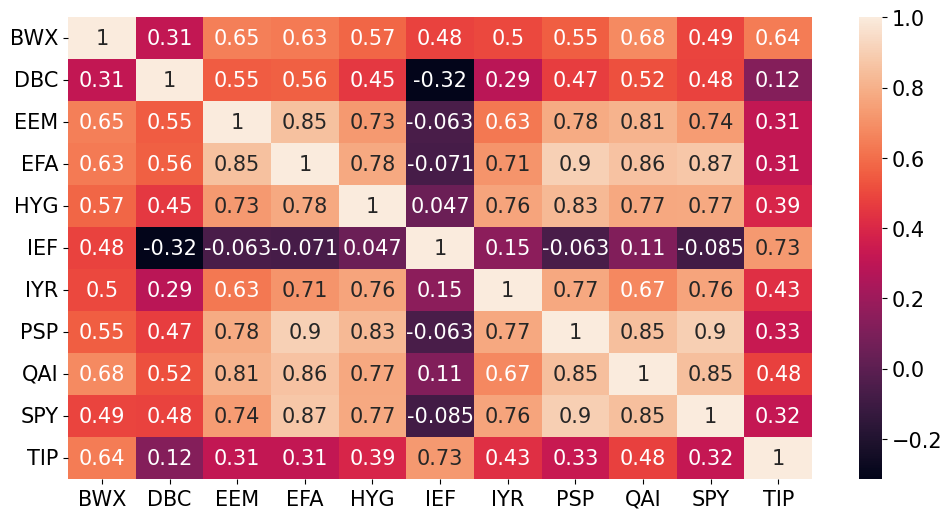

In [9]:
# Heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True)

So the pair with the highest correlation is `PSP` and `EFA`

## (b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

`TIP` had an annualized return of 0.02, while domestic bonds `IEF` had an annualized return of 0.01, `BWX` of -0.004, so TIPS have outperformed domestic and foreign bonds based on the return metric.

Its annualized Sharpe was also higher, at 0.39, which is higher than `IEF`'s 0.17 and `BWX`'s -0.05.

## (c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

Not really; even though its performance is great, its correlations with domestic `IEF` and foreign bonds `BWX` are quite high at 0.73 and 0.64.

# 3. The MV frontier.

In [10]:
# Credit: taken from solution for 2023
def performance_summary(rets, adj_factor=12):
    # Here, we use the keyword argument adj_factor to adjust the
    # annualization factor, which, since in this course we will
    # mainly deal with monthly data, is set to 12 by default.

    summary = {}
    summary["Annualized Mean"] = rets.mean() * adj_factor
    summary["Annualized Volatility"] = rets.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=rets.columns)

## (a) Compute and display the weights of the tangency portfolios: $w^{tan}$

In [11]:
cov = df.cov()
invcov = np.linalg.inv(cov)
w_tan = invcov @ rets / (np.ones(len(rets)) @ np.linalg.inv(cov) @ rets)

w_tan_df = pd.DataFrame(w_tan, index=df.columns, columns=["Tangency Portfolio"])
w_tan_df.sort_values('Tangency Portfolio')

,Tangency Portfolio
QAI,-114.131006
BWX,-46.264168
IYR,-12.366143
PSP,-11.528256
EFA,0.512125
DBC,1.701262
TIP,5.451023
EEM,10.018155
HYG,34.746935
IEF,62.959134


## (b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to $w^{tan}$.

In [12]:
performance_summary(df @ w_tan_df)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,8.812157,5.293389,1.664748


# 4. The allocation

## (a) Compute and display the weights of MV portfolios with target returns of $\mu_p$ = .0075.

In [13]:
MU_TARGET = 0.0075
scaling = MU_TARGET / (rets @ w_tan)
print(f'Weight w_p with target returns 0.0075 is')
w_target = w_tan * scaling
w_target_df = pd.DataFrame(w_target, index=df.columns, columns=["Targeted MV Portfolio"])
w_target_df.sort_values('Targeted MV Portfolio')

Weight w_p with target returns 0.0075 is


,Targeted MV Portfolio
QAI,-1.165639
BWX,-0.472504
IYR,-0.126297
PSP,-0.117740
EFA,0.005230
DBC,0.017375
TIP,0.055672
EEM,0.102317
HYG,0.354876
IEF,0.643012


## (b) What is the mean, volatility, and Sharpe ratio for wp?

The targeted monthly mean is 0.0075, so the annualized mean is 0.0075 * 12 = 0.9

In [16]:
performance_summary(df @ w_target_df)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Targeted MV Portfolio,0.09,0.054062,1.664748


## (c) Discuss the allocation. In which assets is the portfolio most long? And short?

The portfolio is most long in `SPY, IEF, HYG`, and most short in `QAI, BWX, IYR`. In particular, `QAI`'s short position is a lot more significant than `BWX`.

## (d) Does this line up with which assets have the strongest Sharpe ratios?

In [ ]:
performance_summary(df).sort_values('Annualized Sharpe Ratio')

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
BWX,-0.004532,0.085384,-0.053080
DBC,0.021884,0.175468,0.124717
IEF,0.011250,0.064291,0.174981
EEM,0.064970,0.194206,0.334541
QAI,0.019373,0.050940,0.380306
TIP,0.020233,0.051752,0.390955
EFA,0.083817,0.164818,0.508542
PSP,0.134369,0.226988,0.591964
IYR,0.122743,0.189811,0.646659
HYG,0.062909,0.088292,0.712512


The result partially agrees with the individual annualized Sharpe ratio. In particular, `SPY` and `HYG` have the 2 highest Sharpe ratios, while `BWX` has the lowest Sharpe ratio, with `QAI` and `IYR` at 5th and 3rd worst. The most surprising is `IYR`, which has 3rd highest Sharpe, but our portfolio above shorts it.

# 5. Simple Portfolios

## (a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the entire weighting vector to have target mean μp = .0075. Report its mean, volatility, and Sharpe ratio.

The rescaled weighting vector with target mean 0.0075 is

In [21]:
w_equal = 0.0075 / np.sum(rets) * np.ones(len(rets))
w_equal_df = pd.DataFrame(w_equal, index=df.columns, columns=["Equal Weights Portfolio"])
w_equal_df

,Equal Weights Portfolio
BWX,0.131936
DBC,0.131936
EEM,0.131936
EFA,0.131936
HYG,0.131936
IEF,0.131936
IYR,0.131936
PSP,0.131936
QAI,0.131936
SPY,0.131936


The performance is

In [22]:
performance_summary(df @ w_equal_df)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Equal Weights Portfolio,0.09,0.15107,0.595752


## (b) Calculate the performance of the “risk-parity” portfolio over the sample.

In [31]:
w_rp = 1/vols
w_rp *= MU_TARGET / (rets @ w_rp)
w_rp_df = pd.DataFrame(w_rp, index=df.columns, columns=["Risk-Parity Portfolio"])
w_rp_df

,Risk-Parity Portfolio
BWX,0.219895
DBC,0.107003
EEM,0.096679
EFA,0.113917
HYG,0.212652
IEF,0.292042
IYR,0.098917
PSP,0.082716
QAI,0.368585
SPY,0.126957


In [32]:
performance_summary(df @ w_rp_df)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Risk-Parity Portfolio,0.09,0.154956,0.580809


## (c) Compare

The weights and performance of the different portfolios are

In [35]:
pd.concat([w_target_df, w_equal_df, w_rp_df], axis = 1)

,Targeted MV Portfolio,Equal Weights Portfolio,Risk-Parity Portfolio
BWX,-0.472504,0.131936,0.219895
DBC,0.017375,0.131936,0.107003
EEM,0.102317,0.131936,0.096679
EFA,0.005230,0.131936,0.113917
HYG,0.354876,0.131936,0.212652
IEF,0.643012,0.131936,0.292042
IYR,-0.126297,0.131936,0.098917
PSP,-0.117740,0.131936,0.082716
QAI,-1.165639,0.131936,0.368585
SPY,0.713910,0.131936,0.126957


In [42]:
pd.concat([performance_summary(df @ w_target_df), performance_summary(df @ w_equal_df), performance_summary(df @ w_rp_df)], axis = 0).T

,Targeted MV Portfolio,Equal Weights Portfolio,Risk-Parity Portfolio
Annualized Mean,0.090000,0.090000,0.090000
Annualized Volatility,0.054062,0.151070,0.154956
Annualized Sharpe Ratio,1.664748,0.595752,0.580809


Clearly, the targeted MV portfolio achieves a higher Sharpe than the simpler models, such as equal weights and risk-parity.

# 6. Assess how much the Sharpe Ratio goes down if we drop TIPS from the investment set, (and just have a 10-asset problem.) See how much it decreases the performance statistics in 2.4. And how much worse is the performance in 3.3?